In [41]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
from sklearn.datasets import make_blobs

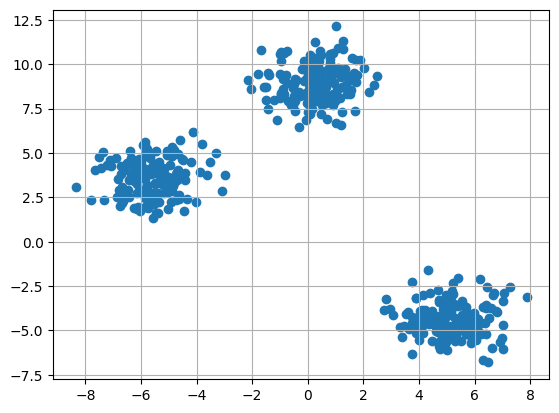

In [61]:

X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [62]:
k = 3
clusters = {}
np.random.seed(42)
for i in range(k):
  center = 2*(2*np.random.random((X.shape[1],))-1)
  points = []
  cluster = {
      'center' : center,
      'points' : []
  }
  clusters[i] = cluster
clusters

{0: {'center': array([-0.50183952,  1.80285723]), 'points': []},
 1: {'center': array([0.92797577, 0.39463394]), 'points': []},
 2: {'center': array([-1.37592544, -1.37602192]), 'points': []}}

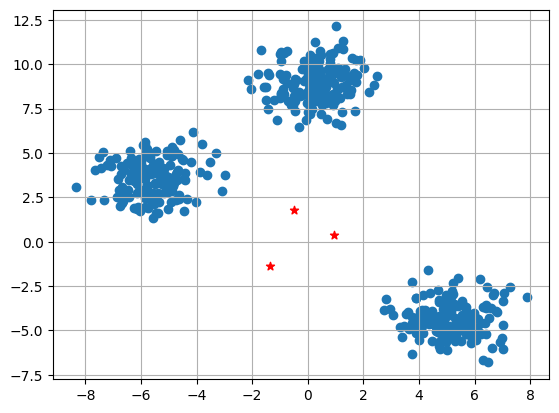

In [63]:

plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [64]:
def distance(p1, p2):
  return np.sqrt(np.sum((p1 - p2)**2))

In [65]:
def assign_clusters(data, clusters):
  for i in range(data.shape[0]):
    dist = []
    curr_x = data[i]
    for i in range(k):
      dis = distance(curr_x, clusters[i]['center'])
      dist.append(dis)
    new_cluster = np.argmin(dist)
    clusters[new_cluster]["points"].append(curr_x)
  return clusters

def update_clusters(X, clusters):
  for i in range(len(clusters)):
    points = np.array(clusters[i]['points'])

    if points.shape[0] > 0:
      new_center = points.mean(axis = 0)
      clusters[i]['center'] = new_center
      clusters[i]['points'] = []

  return clusters

In [66]:
def pred_clusters(X, clusters):
  pred = []
  for i in range(X.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance(X[i], clusters[j]["center"]))
    pred.append(np.argmin(dist))
  return pred

In [67]:
clusters = assign_clusters(X, clusters)
clusters = update_clusters(X, clusters)
pred = pred_clusters(X, clusters)

In [68]:
print(pred)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 

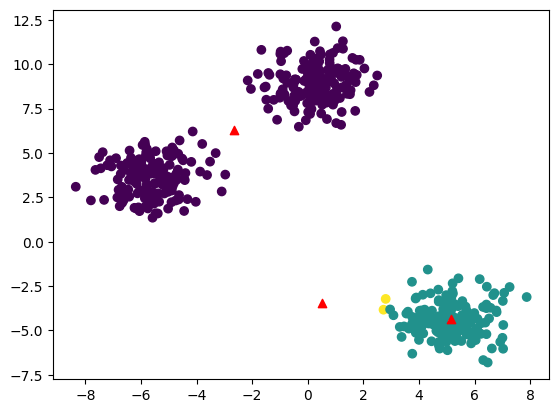

In [69]:

plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()
